<a href="https://colab.research.google.com/github/sayarghoshroy/Intro_to_DL_tutorial/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# *Example 3*

$Let\ our\ Linear\ Classifier\ be\ f$

$Therefore, f(x) = sign(w_0.x_0 + w_1.x_1 +w_2.1),\ x\ being\ [x_0, x_1, 1]$

$where\ the\ weight\ vector\ W = [w_0, w_1, w_2]\ is\ to\ be\ learned$

In [0]:
# Generating Data for Two Classes
covmat = np.asarray([[16, 0], [0, 9]])
mean_A = np.asarray([-3, 4])
mean_B = np.asarray([4, -3])

train_A = np.random.multivariate_normal(mean_A, covmat, 200)
train_B = np.random.multivariate_normal(mean_B, covmat, 200)

test_A = np.random.multivariate_normal(mean_A, covmat, 100)
test_B = np.random.multivariate_normal(mean_B, covmat, 100)

train = np.concatenate((np.concatenate((train_A, train_B), axis = 0), np.asmatrix(np.ones(400)).T), axis = 1).T
train_labels = np.asmatrix(np.concatenate((np.ones(200), -1 * np.ones(200)), axis = 0))

test = np.concatenate((np.concatenate((test_A, test_B), axis = 0), np.asmatrix(np.ones(200)).T), axis = 1).T
test_labels = np.asmatrix(np.concatenate((np.ones(100), -1 * np.ones(100)), axis = 0))

N_train = 400 # training size
N_test = 200 # testing size

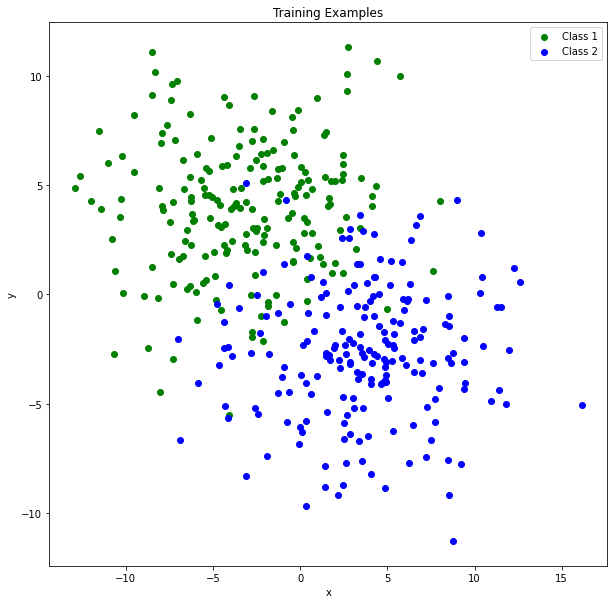

In [0]:
# visualizing the training data

fig = plt.figure(figsize=(10, 10))
p = fig.add_subplot('111')
p.set_title('Training Examples')
p.set_xlabel('x')
p.set_ylabel('y')
p.scatter([point[0] for point in train_A], [point[1] for point in train_A], color = 'green', label = 'Class 1')
p.scatter([point[0] for point in train_B], [point[1] for point in train_B], color = 'blue', label = 'Class 2')
p.legend()
plt.savefig('train.png')
plt.show()

$if\ y\ is\ the\ set\ of\ N\ labels,$

<br>

$loss\ J\ = \frac{1}{N}||y - W^TX||^2,\ where\ X\ is\ the\ set\ of\ all\ samples$

$ = \frac{1}{N}(y - W^TX)^T(y - W^TX) $ 

$ = \frac{1}{N}(y^Ty - y^TW^TX - X^TWy + X^TWW^TX$)

<br>

$\frac{dJ}{dW} = \frac{1}{N}(-y^TX - X^Ty + 2X^TWX) $

$ = \frac{2}{N}X^TWX - \frac{2}{N}X^Ty $

$ = \frac{2}{N}X^T(WX - y) $

In [0]:
# training the set of weights using Gradient Descent

def training(train, eta = 0.02):
    W_previous = np.asmatrix(np.zeros(3))
    W = np.asmatrix(np.ones(3))
    
    train_errors = []
    iteration = 0

    while np.linalg.norm(W - W_previous) > 1e-4:
        train_errors.append(1 / N_train * np.linalg.norm(train_labels - np.matmul(W, train)) ** 2)
        W_previous = W
        W = W - eta * 2 / N_train * np.matmul(train, (np.matmul(W, train) - train_labels).T).T
        iteration += 1

    print("Number of Iterations = " + str(iteration))
    return train_errors, W

train_errors, weights = training(train)
print("Computed Weights: " + str(np.matrix.tolist(weights)[0]))

Number of Iterations = 153
Computed Weights: [-0.07241478273222487, 0.12605253146948187, -0.06777270829894634]


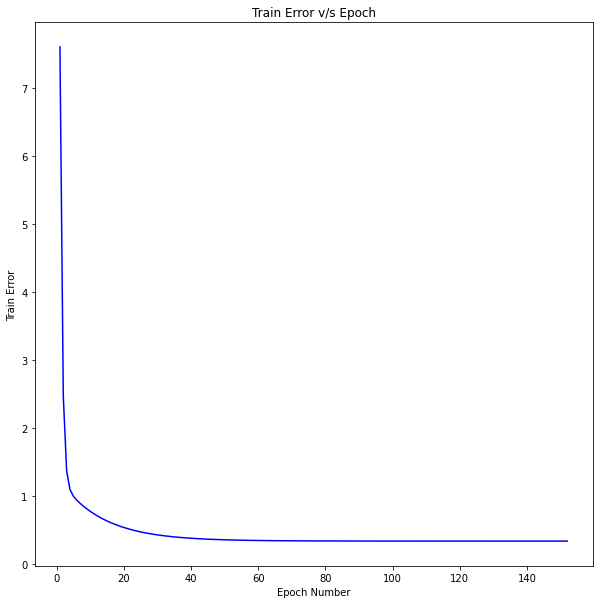

In [0]:
# Visualize the Drop in the defined Error Function
# Plot for Training Errors
fig = plt.figure(figsize=(10, 10))
p = fig.add_subplot('111')
p.set_title('Train Error v/s Epoch')
p.set_xlabel('Epoch Number')
p.set_ylabel('Train Error')
p.plot(list(range(1, len(train_errors))), train_errors[1:], color = 'blue')
plt.show()

In [0]:
# Computing the Equation of our Classifier Line
m = -weights[0, 0] / weights[0 ,1]
c = -weights[0, 2] / weights[0, 1]
# Equation of line in y = m.x + c format

In [0]:
# defining plot boundaries
x = np.linspace(-15, 15, 300)
y = m * x + c

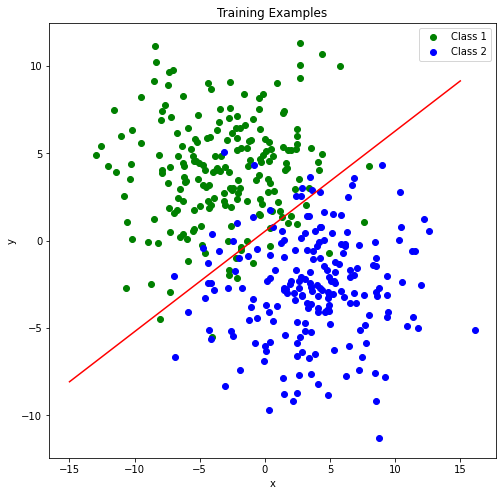

In [0]:
# Classifier Fit on Training Data

fig = plt.figure(figsize=(8, 8))
p = fig.add_subplot('111')
p.set_title('Training Examples')
p.set_xlabel('x')
p.set_ylabel('y')
p.scatter([point[0] for point in train_A], [point[1] for point in train_A], color = 'green', label = 'Class 1')
p.scatter([point[0] for point in train_B], [point[1] for point in train_B], color = 'blue', label = 'Class 2')
p.plot(x, y, '-r')
p.legend()
plt.show()

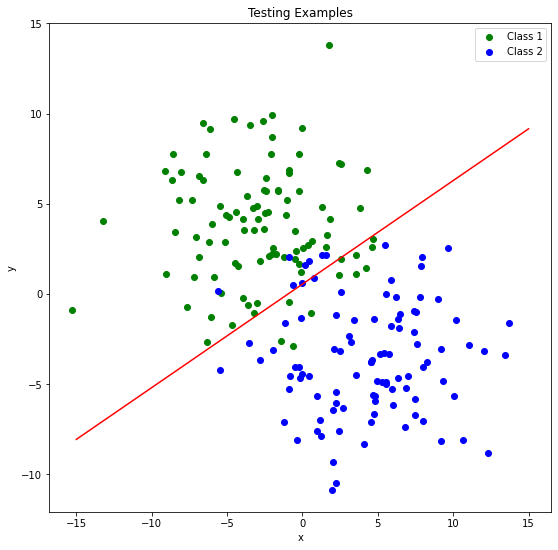

In [0]:
# Performance on Test Data

fig = plt.figure(figsize=(9, 9))
q = fig.add_subplot('111')
q.set_title('Testing Examples')
q.set_xlabel('x')
q.set_ylabel('y')
q.scatter([point[0] for point in test_A], [point[1] for point in test_A], color = 'green', label = 'Class 1')
q.scatter([point[0] for point in test_B], [point[1] for point in test_B], color = 'blue', label = 'Class 2')
q.plot(x, y, '-r')
q.legend()
plt.show()

### $ Try\ to\ do\ the\ same\ using\ Scikit\ learn. $

## You can get started [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [0]:
# ^_^ Thank You